In [ ]:
###오리온 주가 분석
## 목표
# 오리온 기업의 전체 일별 주가를 수집하여 전체 주식의 흐름 분석
# 주식의 흐름에 따라 최적의 투자 포인트 분석
# 투자 포인트에 영향을 주는 요소 분석
# 기업분석
# 주식분석
   # 1) url : https://finance.naver.com/item/sise.nhn?code=271560
    # 2) 일별현황

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import requests
from bs4 import BeautifulSoup as bsp
import sqlite3

In [2]:
code = 271560
pgno = 2
url = 'https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl

'https://finance.naver.com/item/sise_day.nhn?code=271560&page=2'

In [3]:
def getPage(tgurl):
    headerdata = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36',
    }
    src=requests.get(tgurl,headers=headerdata)
    cont=src.content.strip()
    html=bsp(cont, 'html.parser')
    tgts=html.select("table.type2 tr")
    stocklist=[]
    for t in tgts:
        sday=t.select(".gray03")
        tds=t.select('td')
        if(sday):
            tkey=sday[0].text.replace('.','')
            tday=sday[0].text.replace('.','-')
            topen=tds[3].text.replace(',','')
            thigh=tds[4].text.replace(',','')
            tlow=tds[5].text.replace(',','')
            tclose=tds[1].text.replace(',','')
            tvol=tds[6].text.replace(',','')
            stocklist.append([tday,topen,thigh,tlow,tclose,tvol,tkey])
    return stocklist

In [4]:
def dataprs(d=[]):
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        if d :
            sql='select skey from stockp where skey={}'.format(d[6])
            checkkey=cur.execute(sql).fetchall()
            if checkkey:
                print("중복있음:",d[6])
            else:
                sql="insert into stockp (sday,sopen,shigh,slow,sclose,svol,skey) values(?,?,?,?,?,?,?)"
                cur.execute(sql,d)
                print('입력완료 - ',d[0])
        else:
            sql='select * from stockp'
            result=cur.execute(sql).fetchall()
            print(result)

In [5]:
for i in range(1,900):
    tgurl=url.format(code,i)
    slist=getPage(tgurl)
    for s in slist:
        dataprs(s)

입력완료 -  2021-02-24
입력완료 -  2021-02-23
입력완료 -  2021-02-22
입력완료 -  2021-02-19
입력완료 -  2021-02-18
입력완료 -  2021-02-17
입력완료 -  2021-02-16
입력완료 -  2021-02-15
입력완료 -  2021-02-10
입력완료 -  2021-02-09
입력완료 -  2021-02-08
입력완료 -  2021-02-05
입력완료 -  2021-02-04
입력완료 -  2021-02-03
입력완료 -  2021-02-02
입력완료 -  2021-02-01
입력완료 -  2021-01-29
입력완료 -  2021-01-28
입력완료 -  2021-01-27
입력완료 -  2021-01-26
입력완료 -  2021-01-25
입력완료 -  2021-01-22
입력완료 -  2021-01-21
입력완료 -  2021-01-20
입력완료 -  2021-01-19
입력완료 -  2021-01-18
입력완료 -  2021-01-15
입력완료 -  2021-01-14
입력완료 -  2021-01-13
입력완료 -  2021-01-12
입력완료 -  2021-01-11
입력완료 -  2021-01-08
입력완료 -  2021-01-07
입력완료 -  2021-01-06
입력완료 -  2021-01-05
입력완료 -  2021-01-04
입력완료 -  2020-12-30
입력완료 -  2020-12-29
입력완료 -  2020-12-28
입력완료 -  2020-12-24
입력완료 -  2020-12-23
입력완료 -  2020-12-22
입력완료 -  2020-12-21
입력완료 -  2020-12-18
입력완료 -  2020-12-17
입력완료 -  2020-12-16
입력완료 -  2020-12-15
입력완료 -  2020-12-14
입력완료 -  2020-12-11
입력완료 -  2020-12-10
입력완료 -  2020-12-09
입력완료 -  2020-12-08
입력완료 -  2020

입력완료 -  2019-05-16
입력완료 -  2019-05-15
입력완료 -  2019-05-14
입력완료 -  2019-05-13
입력완료 -  2019-05-10
입력완료 -  2019-05-09
입력완료 -  2019-05-08
입력완료 -  2019-05-07
입력완료 -  2019-05-03
입력완료 -  2019-05-02
입력완료 -  2019-04-30
입력완료 -  2019-04-29
입력완료 -  2019-04-26
입력완료 -  2019-04-25
입력완료 -  2019-04-24
입력완료 -  2019-04-23
입력완료 -  2019-04-22
입력완료 -  2019-04-19
입력완료 -  2019-04-18
입력완료 -  2019-04-17
입력완료 -  2019-04-16
입력완료 -  2019-04-15
입력완료 -  2019-04-12
입력완료 -  2019-04-11
입력완료 -  2019-04-10
입력완료 -  2019-04-09
입력완료 -  2019-04-08
입력완료 -  2019-04-05
입력완료 -  2019-04-04
입력완료 -  2019-04-03
입력완료 -  2019-04-02
입력완료 -  2019-04-01
입력완료 -  2019-03-29
입력완료 -  2019-03-28
입력완료 -  2019-03-27
입력완료 -  2019-03-26
입력완료 -  2019-03-25
입력완료 -  2019-03-22
입력완료 -  2019-03-21
입력완료 -  2019-03-20
입력완료 -  2019-03-19
입력완료 -  2019-03-18
입력완료 -  2019-03-15
입력완료 -  2019-03-14
입력완료 -  2019-03-13
입력완료 -  2019-03-12
입력완료 -  2019-03-11
입력완료 -  2019-03-08
입력완료 -  2019-03-07
입력완료 -  2019-03-06
입력완료 -  2019-03-05
입력완료 -  2019-03-04
입력완료 -  2019

입력완료 -  2017-08-04
입력완료 -  2017-08-03
입력완료 -  2017-08-02
입력완료 -  2017-08-01
입력완료 -  2017-07-31
입력완료 -  2017-07-28
입력완료 -  2017-07-27
입력완료 -  2017-07-26
입력완료 -  2017-07-25
입력완료 -  2017-07-24
입력완료 -  2017-07-21
입력완료 -  2017-07-20
입력완료 -  2017-07-19
입력완료 -  2017-07-18
입력완료 -  2017-07-17
입력완료 -  2017-07-14
입력완료 -  2017-07-13
입력완료 -  2017-07-12
입력완료 -  2017-07-11
입력완료 -  2017-07-10
입력완료 -  2017-07-07
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중

중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 20170707
중복있음: 2017

In [ ]:
## 어제한거 이어서.. import창만 누르고 실행하면 내가 넣은 sql자료에서 다음의 정보를 가지고옴

In [6]:
def getDB():
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from stockp order by skey asc'
        qry=cur.execute(sql)
        desc = [row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [7]:
res=getDB()
res[0]

['sidx', 'sday', 'sopen', 'shigh', 'slow', 'sclose', 'svol', 'skey']

In [8]:
df=pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

,sday,sopen,shigh,slow,sclose,svol,skey
sidx,,,,,,,
1357,2017-07-07,87100,89700,75700,82300,1619864,20170707
1356,2017-07-10,82300,88000,81000,88000,840451,20170710
1355,2017-07-11,88000,88000,82700,82800,422303,20170711
1354,2017-07-12,83700,84600,80000,83500,238407,20170712
1353,2017-07-13,83400,84000,80800,81600,218138,20170713


In [ ]:
## 이제 저 판다스값으로 그래프 그리기

<AxesSubplot:xlabel='sday'>

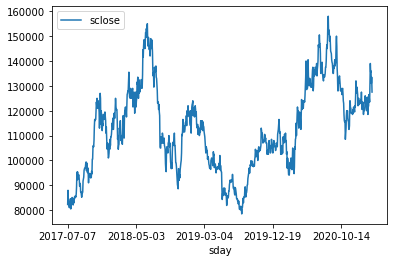

In [9]:
df.plot.line(x='sday', y='sclose')

In [19]:
## 오늘날짜와 종가를 가지고옴
cdf=df[['sday','sclose']].copy()
cdf.head()

,sday,sclose
sidx,,
1357,2017-07-07,82300
1356,2017-07-10,88000
1355,2017-07-11,82800
1354,2017-07-12,83500
1353,2017-07-13,81600


In [20]:
## 전일자를 nan으로 가지고옴
cdf['preday']=cdf['sclose'].shift(1)
cdf.head()

,sday,sclose,preday
sidx,,,
1357,2017-07-07,82300,NaN
1356,2017-07-10,88000,82300.0
1355,2017-07-11,82800,88000.0
1354,2017-07-12,83500,82800.0
1353,2017-07-13,81600,83500.0


In [21]:
## updown으로 전일보다 오늘이 높은지 낮은지를 구해서 updown으로 나타내기
cdf['updown']=(df['sclose']>df['preday']).astype(int)
cdf.head()

,sday,sclose,preday,updown
sidx,,,,
1357,2017-07-07,82300,NaN,0
1356,2017-07-10,88000,82300.0,1
1355,2017-07-11,82800,88000.0,0
1354,2017-07-12,83500,82800.0,1
1353,2017-07-13,81600,83500.0,0


In [35]:
## updown을 분석하려고 int형태로 astype을 바꿔주기
cdf['updown']=(df['sclose']>cdf['preday']).astype(int)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
1357,2017-07-07,82300,0.0,1,0.0,1
1356,2017-07-10,88000,82300.0,1,1.0,0
1355,2017-07-11,82800,88000.0,0,1.0,-1
1354,2017-07-12,83500,82800.0,1,0.0,1
1353,2017-07-13,81600,83500.0,0,1.0,-1


In [36]:
## 위에서 구한 updown을 전날의 updown과 비교하도록 들고옴 preupdown...!
cdf['preupdown']=cdf['updown'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
1357,2017-07-07,82300,0.0,1,0.0,1
1356,2017-07-10,88000,82300.0,1,1.0,0
1355,2017-07-11,82800,88000.0,0,1.0,-1
1354,2017-07-12,83500,82800.0,1,0.0,1
1353,2017-07-13,81600,83500.0,0,1.0,-1


In [ ]:
## 투자포인트잡기

In [68]:
## updown 과 preupdown을 가지고 sellpos잡기 
## 11유지 0 , 01매도 -1, 10매수 1
## 전일보다 상승 = 매수1, 전일보다 하락 = 매도 -1, 상승중이거나 하락중이면 = 유지 0
## debt통장잔고: 현찰
## instock 주식잔고: 주식보유수
## credit 주식가치
cdf['sellpos']= np.where(cdf['updown']> cdf['preupdown'],1,0)+np.where(cdf['updown']<cdf['preupdown'],-1,0)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
1357,2017-07-07,82300,0.0,1,0.0,1
1356,2017-07-10,88000,82300.0,1,1.0,0
1355,2017-07-11,82800,88000.0,0,1.0,-1
1354,2017-07-12,83500,82800.0,1,0.0,1
1353,2017-07-13,81600,83500.0,0,1.0,-1


In [74]:
## debt통장잔고: 현찰
## instock 주식잔고: 주식보유수
## credit 주식가치

def finprs(df):
    fdf=df.copy()
    precre = 0 # 시작하는 주식 잔고
    predeb = 1000000 # 시작하는 통장 잔고
    prestock = 1
   
 
    for idx, row in fdf.iterrows():
       
        if(row.loc['sellpos']== 1 and prestock == 0):#사라는 신호가 왔고 주식잔고가 없을경우, 그럼 살만큼 잔고가 있나?
            canbuy = predeb//row.loc['sclose'] ## 살수있는 주식의 갯수
            if(canbuy>0):
                # 조건이 맞고 돈도있당
                cre = precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else: ## 조건이 맞지만 돈이없당
                instock=prestock
                cre=precre
                deb=predeb
                
        elif(row.loc['sellpos']== -1 and prestock>0): #팔라는 신호가 왔고 주식잔고가 있는경우 -> 팔아야지
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos=1, prestock=1 // sellpos=-1,prestock: 0 // no debt 같은 경우
        else:
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx, 'hasstock']=instock
        fdf.loc[idx, 'debt']=deb
        fdf.loc[idx, 'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
        
    return fdf
rdf=finprs(cdf)
rdf.head(20)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
1357,2017-07-07,82300,0.0,1,0.0,1,1.0,1000000.0,0.0
1356,2017-07-10,88000,82300.0,1,1.0,0,1.0,1000000.0,0.0
1355,2017-07-11,82800,88000.0,0,1.0,-1,0.0,1082800.0,0.0
1354,2017-07-12,83500,82800.0,1,0.0,1,12.0,80800.0,1002000.0
1353,2017-07-13,81600,83500.0,0,1.0,-1,0.0,1060000.0,0.0
1352,2017-07-14,81000,81600.0,0,0.0,0,0.0,1060000.0,0.0
1351,2017-07-17,82200,81000.0,1,0.0,1,12.0,73600.0,986400.0
1350,2017-07-18,83300,82200.0,1,1.0,0,12.0,73600.0,986400.0
1349,2017-07-19,84600,83300.0,1,1.0,0,12.0,73600.0,986400.0


In [75]:
rdf.tail(10)



,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
476,2021-02-09,126500,122000.0,1,1.0,0,4.0,100500.0,486000.0
475,2021-02-10,125000,126500.0,0,1.0,-1,0.0,600500.0,0.0
474,2021-02-15,123500,125000.0,0,0.0,0,0.0,600500.0,0.0
473,2021-02-16,131500,123500.0,1,0.0,1,4.0,74500.0,526000.0
472,2021-02-17,139000,131500.0,1,1.0,0,4.0,74500.0,526000.0
471,2021-02-18,135500,139000.0,0,1.0,-1,0.0,616500.0,0.0
470,2021-02-19,136000,135500.0,1,0.0,1,4.0,72500.0,544000.0
469,2021-02-22,131000,136000.0,0,1.0,-1,0.0,596500.0,0.0
468,2021-02-23,133500,131000.0,1,0.0,1,4.0,62500.0,534000.0


In [ ]:
rdf.plot

In [ ]:
###여기부터는 복습자료

In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import requests
from bs4 import BeautifulSoup as bsp

In [ ]:

code = 271560
pgno = 2

url = 'https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl


In [ ]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
src=requests.get(tgurl, headers=headers)
cont=src.content.strip() #와글와글 나옴,공백이없어서 strip
html=bsp(cont, 'html.parser')
html

In [ ]:
tgts =html.select('table.type2 tr')
tgts.append(tgts)

len(tgts)

In [ ]:
stocklist = []
for t in tgts:
    sday=t.select('.gray03')
    tds=t.select('td')
    if(sday):
        tkey = sday[0].text.replace(".","")
        tday=sday[0].text.replace('.','-')
        topen=tds[3].text.replace('.','-')
        thigh=tds[4].text.replace('.','-')
        tlow=tds[5].text.replace('.','-')
        tclose=tds[1].text.replace('.','-')
        tvol=tds[6].text.replace('.','-')

        a = [tday, topen, thigh,tlow, tclose, tvol,tkey]
        stocklist.append(a)
        

In [ ]:
for i in range(len(stocklist)):
    dataprs(stocklist[i])

In [ ]:
stocklist

In [ ]:
dataprs("끝")


In [ ]:
stocklist=[]
for t in tgts:
    sday=t.select('.gray03')
    tds=t.select('td')
    if(sday):
        tkey = sday[0].text.replace(".","")
        tday=sday[0].text.replace('.','-')
        topen=tds[3].text.replace('.','-')
        thigh=tds[4].text.replace('.','-')
        tlow=tds[5].text.replace('.','-')
        tclose=tds[1].text.replace('.','-')
        tvol=tds[6].text.replace('.','-')

        print([tday, topen, thigh,tlow, tclose, tvol,tkey])

In [ ]:
def dataprs(d=[]):
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        if type(d) == list:
            sql="insert into stockdata (sday,sopen,shigh,slow,sclose,svol,skey) values(?,?,?,?,?,?,?)"
            cur.execute(sql,d)
            print('입력완료')
        else:
            sql='select * from stockdata'
            result=cur.execute(sql).fetchall()
            print(result)

In [ ]:
dataprs("끝")